<a href="https://colab.research.google.com/github/hwangzie/Detect-Corner-Mark-on-Device-and-Image-Quality/blob/main/Corner_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import os

In [8]:
# load the dir for labeling
data_dir = '/content/drive/MyDrive/Dataset_NBS'
dataset =  tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='binary',
    batch_size=16,
    image_size=(224, 224),
    shuffle=True
)
data_augmentation = tf.keras.Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

Found 72 files belonging to 2 classes.


Labels: [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


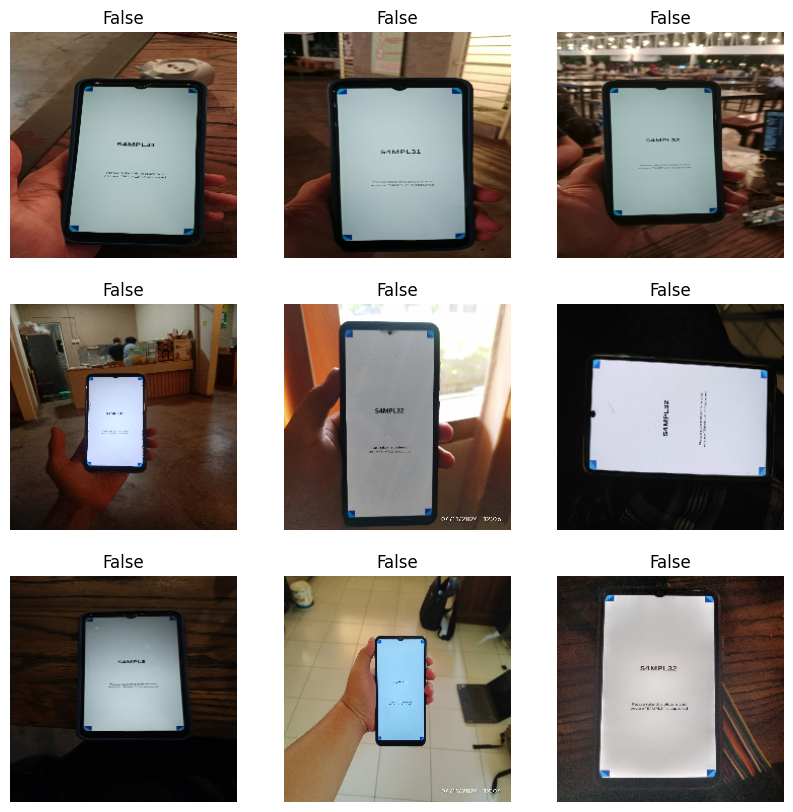

In [9]:
# Display one batch of images and labels
for images, labels in dataset.take(1):  # Take a single batch
    print("Labels:", labels.numpy())    # Print labels (0 or 1 for binary)

    # Plot the images
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Display 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        # Access the probability for the 'True' class (assuming it's the first class)
        # and display 'True' if it's greater than 0.5, otherwise 'False'
        plt.title("False" if labels[i][0] > 0.5 else "True")
        plt.axis("off")
    plt.show()

In [10]:
base_model = tf.keras.applications.MobileNetV3Small(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False
layer_index = None
# for i, layer in enumerate(base_model.layers):
#     if layer.name == 'block_6_project_BN':
#         layer_index = i
#         break
# if layer_index is not None:
#     base_model = tf.keras.Model(inputs=base_model.input, outputs=base_model.layers[layer_index].output)
#     base_model.trainable = False


4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [53]:
model = tf.keras.models.Sequential([
    data_augmentation,
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.4)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [62]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# callback if model reach 89 accuracy
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.89):
            print("\nReached 89% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()


In [55]:
# Import necessary libraries
from IPython.display import clear_output
import gc
import tensorflow as tf
# Clear all variables and garbage collect
gc.collect()
# Reset TensorFlow session to release memory
tf.keras.backend.clear_session()
# Clear the output in Colab
clear_output()

In [56]:
history = model.fit(dataset, epochs=20, callbacks=[callbacks])

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 738ms/step - accuracy: 0.7564 - loss: 280.3938
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7674 - loss: 216.9334
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 731ms/step - accuracy: 0.8073 - loss: 164.6812
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 691ms/step - accuracy: 0.7937 - loss: 122.7094
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8287 - loss: 89.7452
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 800ms/step - accuracy: 0.8414 - loss: 64.4397
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8168 - loss: 45.4421
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 777ms/step - accuracy: 0.8345 - loss: 31.3826
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8157 - loss: 21.4077
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 727ms/step - accuracy: 0.8553 - loss: 14.3263
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8142 - loss: 9.4342
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 730ms/step - accuracy: 0.8464 - lo

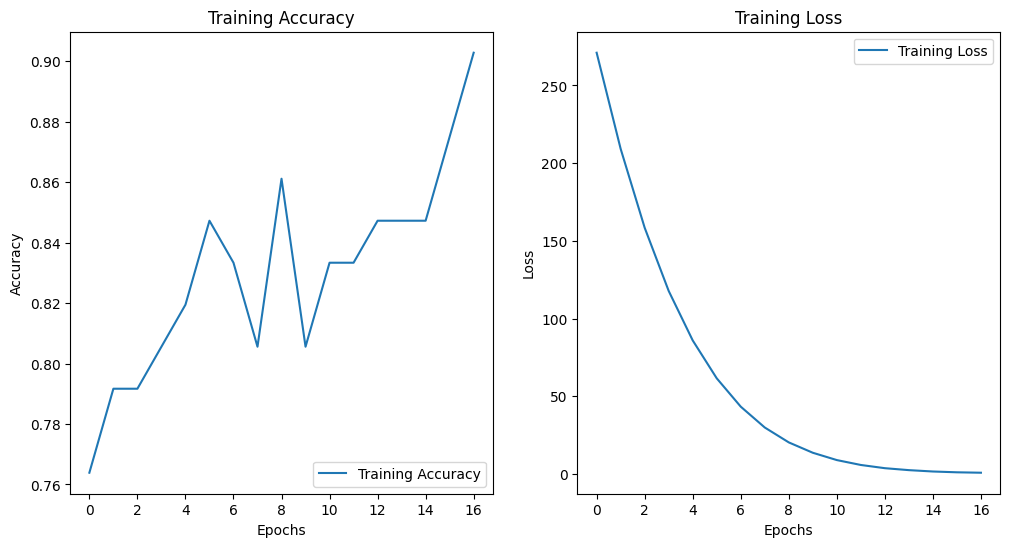

In [57]:
import matplotlib.pyplot as plt

# Plot training accuracy and loss
def plot_training_history(history):
    # Extract accuracy and loss
    acc = history.history['accuracy']
    loss = history.history['loss']

    epochs_range = range(len(acc))

    # Plot Accuracy
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    plt.legend(loc='lower right')

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend(loc='upper right')

    plt.show()

# Call the function with the training history
plot_training_history(history)


In [64]:
import shutil

shutil.make_archive('model', 'zip', 'model')

from google.colab import files
files.download('model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from io import BytesIO
import IPython.display as display
import ipywidgets as widgets
from IPython.display import display

# Create an upload button widget
upload_button = widgets.FileUpload(accept='image/*', multiple=False)
display(upload_button)

# Function to preprocess and predict
def predict_uploaded_image(model, uploaded_file):
    # Read and preprocess the image
    img = Image.open(BytesIO(uploaded_file['content']))
    img = img.resize((224, 224))  # Resize to the input shape used in training
    img_array = np.array(img) / 255.0  # Normalize to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Run prediction
    prediction = model.predict(img_array)

    # Interpret the result
    if prediction[0] > 0.79:
        result = "Sesuai"  # Prediction is class 1
        print(prediction[0])
    else:
        result = "Tidak Sesuai"  # Prediction is class 0
        print(prediction[0])

    # Display the image and result
    plt.imshow(img)
    plt.title(f"Prediction: {result}")
    plt.axis('off')
    plt.show()

    print(f"Prediction result: {result}")
    return result

# Callback function to handle the uploaded file
def on_upload_change(change):
    # Get the uploaded image file content
    uploaded_file = list(upload_button.value.values())[0]
    # Call the prediction function with the uploaded image
    predict_uploaded_image(model, uploaded_file)

# Bind the callback function to the upload button
upload_button.observe(on_upload_change, names='value')


FileUpload(value={}, accept='image/*', description='Upload')

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from io import BytesIO
import IPython.display as display
import ipywidgets as widgets
from IPython.display import display
import numpy as np # Added import for np

# Create an upload button widget
upload_button = widgets.FileUpload(accept='image/*', multiple=False)
display(upload_button)

# Function to preprocess and predict
def predict_uploaded_image(model, uploaded_file):
    # Read and preprocess the image
    img = Image.open(BytesIO(uploaded_file['content']))
    img = img.resize((224, 224))  # Resize to the input shape used in training
    img_array = np.array(img) / 255.0  # Normalize to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Run prediction
    prediction = model.predict(img_array)

    # Interpret the result
    # Assuming prediction[0] contains the probability for class 1 (Sesuai)
    if prediction[0][0] > 0.5914:  # Access the probability value for the relevant class
        result = "Sesuai"  # Prediction is class 1
        print(prediction[0][0]) # Print the probability value
    else:
        result = "Tidak Sesuai"  # Prediction is class 0
        print(prediction[0][0]) # Print the probability value

    # Display the image and result
    plt.imshow(img)
    plt.title(f"Prediction: {result}")
    plt.axis('off')
    plt.show()

    print(f"Prediction result: {result}")
    return result

# Callback function to handle the uploaded file
def on_upload_change(change):
    # Get the uploaded image file content
    uploaded_file = list(upload_button.value.values())[0]
    # Call the prediction function with the uploaded image
    predict_uploaded_image(model, uploaded_file)

# Bind the callback function to the upload button
upload_button.observe(on_upload_change, names='value')

FileUpload(value={}, accept='image/*', description='Upload')

In [ ]:
# convert to tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.experimental_new_converter = True

# Add NormalizationOptions metadata
def representative_dataset_gen():
    for _ in range(100):
        yield [np.random.rand(1, 224, 224, 3).astype(np.float32)]

converter.representative_dataset = representative_dataset_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8  # or tf.int8
converter.inference_output_type = tf.uint8  # or tf.int8

tflite_model = converter.convert()

# Save the quantized model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmp2pyr5fz5'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_190')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  139149629550512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139149628354656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139149628356944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139149628355184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139149628356064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139152266830144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139149626709216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139149626706224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139149626707808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139149626710272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1391496267

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:983: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


In [ ]:
!pip install --upgrade tensorflow # Upgrade to ensure access to newer functionality

interpreter = tf.lite.Interpreter(model_path="model.tflite", experimental_delegates=None)
# Disable XNNPACK delegate explicitly
interpreter.options.use_xnnpack = False
interpreter.allocate_tensors()
# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test with sample input
import numpy as np
sample_input = np.random.rand(1, 224, 224, 3).astype(np.float32)
interpreter.set_tensor(input_details[0]['index'], sample_input)
interpreter.invoke()

# Get predictions
output_data = interpreter.get_tensor(output_details[0]['index'])
print("Model Output:", output_data)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 58.1 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


AttributeError: 'Interpreter' object has no attribute 'options'

In [ ]:
# Load the model
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()
interpreter.options.use_xnnpack = False
# Get input details
input_details = interpreter.get_input_details()
print(input_details)